In [2]:
#1: Data Acquisition and Exploration
#1.1 Load the Dataset

import pandas as pd

# Load dataset
data = pd.read_csv('all_stocks_5yr.csv')
data['date'] = pd.to_datetime(data['date'])
print(data.info())
print(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 619040 entries, 0 to 619039
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   date    619040 non-null  datetime64[ns]
 1   open    619029 non-null  float64       
 2   high    619032 non-null  float64       
 3   low     619032 non-null  float64       
 4   close   619040 non-null  float64       
 5   volume  619040 non-null  int64         
 6   Name    619040 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 33.1+ MB
None
        date   open   high    low  close    volume Name
0 2013-02-08  15.07  15.12  14.63  14.75   8407500  AAL
1 2013-02-11  14.89  15.01  14.26  14.46   8882000  AAL
2 2013-02-12  14.45  14.51  14.10  14.27   8126000  AAL
3 2013-02-13  14.30  14.94  14.25  14.66  10259500  AAL
4 2013-02-14  14.94  14.96  13.16  13.99  31879900  AAL


In [3]:
#1.2 Explore the Dataset
print(data.isnull().sum())

date       0
open      11
high       8
low        8
close      0
volume     0
Name       0
dtype: int64


In [4]:
#2: Data Preprocessing
#2.1 Filter Data for a Specific Company
company_data = data[data['Name'] == 'AAPL']
company_data.set_index('date', inplace=True)
company_data.sort_index(inplace=True)

In [5]:
#2.2 Handling Missing Values
company_data.fillna(method='ffill', inplace=True)
company_data.fillna(method='bfill', inplace=True)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_12368\3232358034.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  company_data.fillna(method='ffill', inplace=True)
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_12368\3232358034.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_data.fillna(method='ffill', inplace=True)
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_12368\3232358034.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  company_data.fillna(method='bfill', inplace=True)
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_12368\3232358034.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice

In [6]:
#2.3 Feature Engineering
company_data['Daily Return'] = company_data['close'].pct_change()
company_data['365 Day MA'] = company_data['close'].rolling(window=365).mean()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_12368\2622766779.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_data['Daily Return'] = company_data['close'].pct_change()
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_12368\2622766779.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_data['365 Day MA'] = company_data['close'].rolling(window=365).mean()


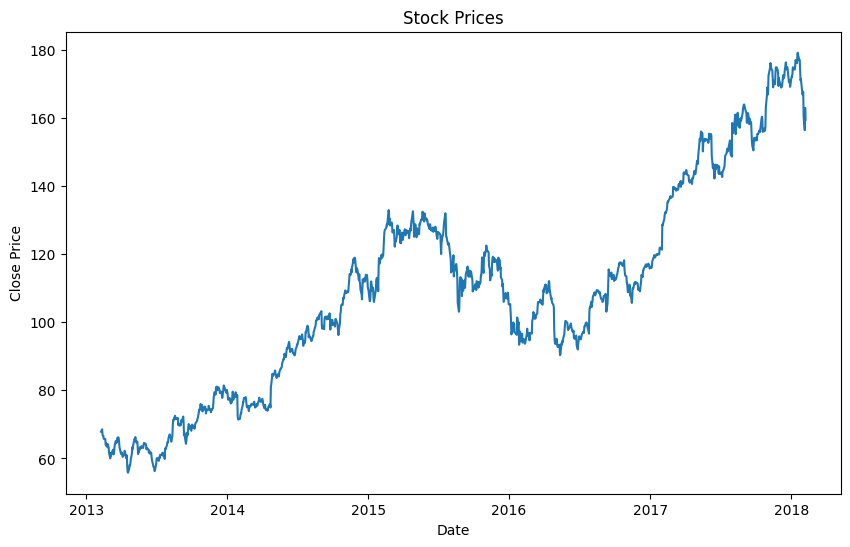

In [7]:
#3: Stationarity Testing
#3.1 Plot the Time Series

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(company_data['close'])
plt.title('Stock Prices')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.show()

In [8]:
#3.2 ADF Test for Stationarity
from statsmodels.tsa.stattools import adfuller

result = adfuller(company_data['close'].dropna())
print('ADF Statistic:', result[0])
print('p-value:', result[1])
for key, value in result[4].items():
    print('Critical Value {}: {:.3f}'.format(key, value))

ADF Statistic: -0.6650906914089925
p-value: 0.8555858445838951
Critical Value 1%: -3.436
Critical Value 5%: -2.864
Critical Value 10%: -2.568


In [9]:
#3.3 Differencing if Not Stationary
company_data['Differenced'] = company_data['close'].diff().dropna()
result = adfuller(company_data['Differenced'].dropna())
print('ADF Statistic:', result[0])
print('p-value:', result[1])

ADF Statistic: -34.82009125088739
p-value: 0.0


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_12368\1088789460.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_data['Differenced'] = company_data['close'].diff().dropna()


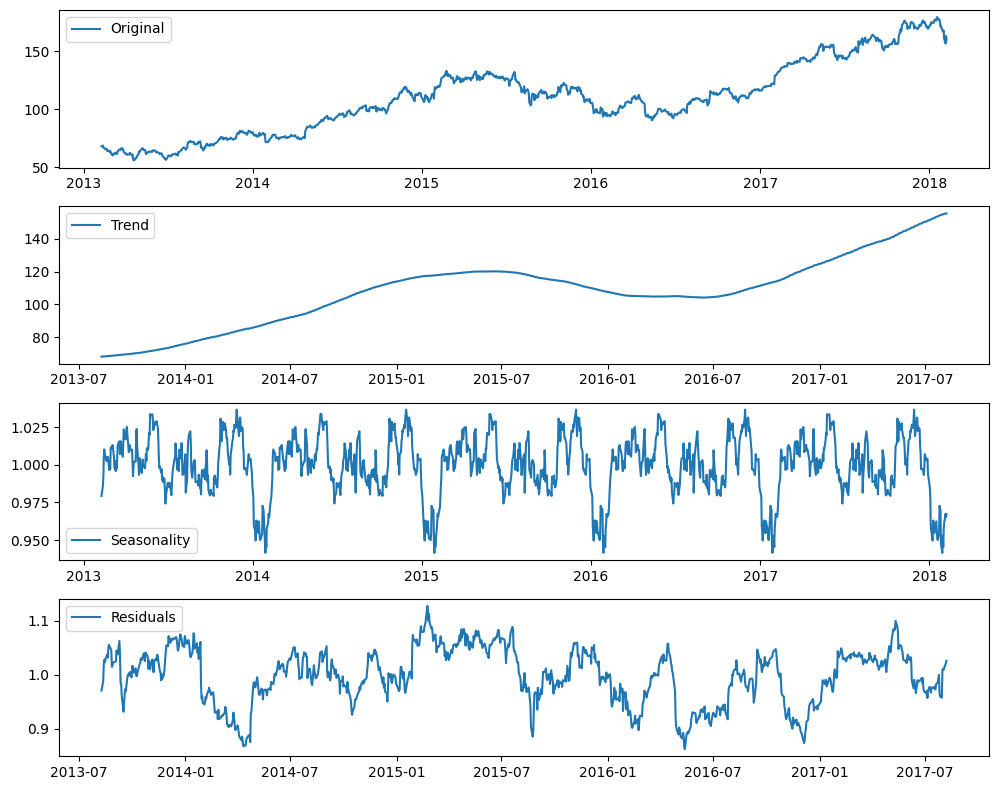

In [10]:
#4: Estimating Trend and Seasonality
#4.1 Decompose the Time Series
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(company_data['close'], model='multiplicative', period=252)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(10, 8))
plt.subplot(411)
plt.plot(company_data['close'], label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
plt.show()


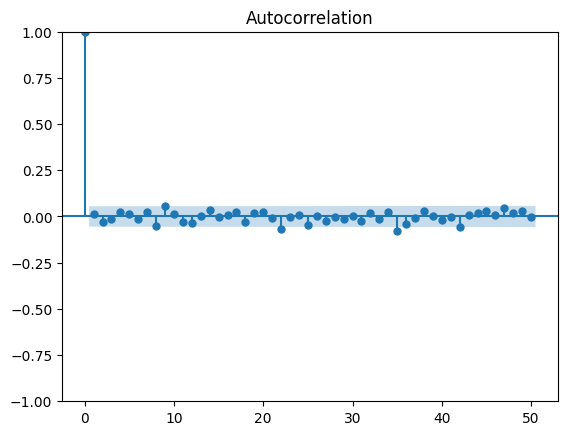

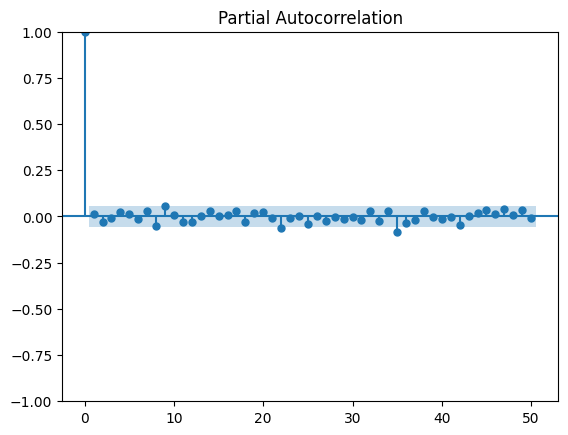

In [11]:
#5. Modeling
#5.1 ARIMA model

#Determine the order (p, d, q) using ACF and PACF plots.
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(company_data['Differenced'].dropna(), lags=50)
plot_pacf(company_data['Differenced'].dropna(), lags=50)
plt.show()


In [12]:
#Fit the ARIMA model.
from statsmodels.tsa.arima.model import ARIMA

#Assume from plot we have
d = 1 
p = 0
q = 0

model = ARIMA(company_data['close'], order=(p, d, q))
fitted_model = model.fit()
print(fitted_model.summary())


                               SARIMAX Results                                
Dep. Variable:                  close   No. Observations:                 1259
Model:                 ARIMA(0, 1, 0)   Log Likelihood               -2357.402
Date:                Fri, 07 Jun 2024   AIC                           4716.804
Time:                        22:03:40   BIC                           4721.942
Sample:                             0   HQIC                          4718.735
                               - 1259                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         2.4843      0.057     43.793      0.000       2.373       2.595
Ljung-Box (L1) (Q):                   0.29   Jarque-Bera (JB):               887.90
Prob(Q):                              0.59   Pr

c:\Users\ADMIN\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ADMIN\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ADMIN\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


c:\Users\ADMIN\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\ADMIN\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


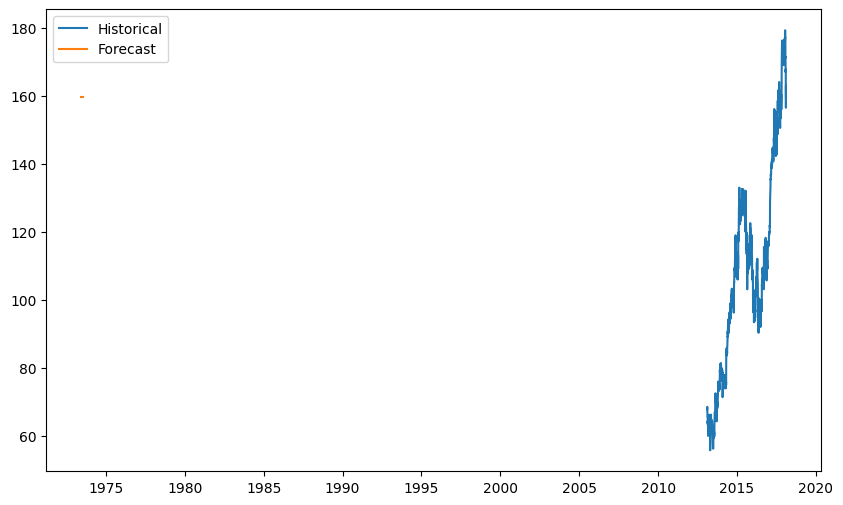

In [13]:
#5.2 Forecasting
forecast = fitted_model.forecast(steps=30)
plt.figure(figsize=(10, 6))
plt.plot(company_data['close'], label='Historical')
plt.plot(forecast, label='Forecast')
plt.legend(loc='best')
plt.show()


In [14]:
#6.Multidimensional Time Series
#6.1 VAR model
#Prepare the dataset with multiple companies' closing prices.
selected_companies = data[data['Name'].isin(['AAPL', 'MSFT', 'GOOGL'])]
pivot_data = selected_companies.pivot_table(index='date', columns='Name', values='close')
pivot_data.fillna(method='ffill', inplace=True)
pivot_data.fillna(method='bfill', inplace=True)


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_12368\1198088009.py:6: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  pivot_data.fillna(method='ffill', inplace=True)
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_12368\1198088009.py:7: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  pivot_data.fillna(method='bfill', inplace=True)


In [15]:
#Fit the VAR model.
from statsmodels.tsa.api import VAR

model = VAR(pivot_data)
model_fitted = model.fit()


c:\Users\ADMIN\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


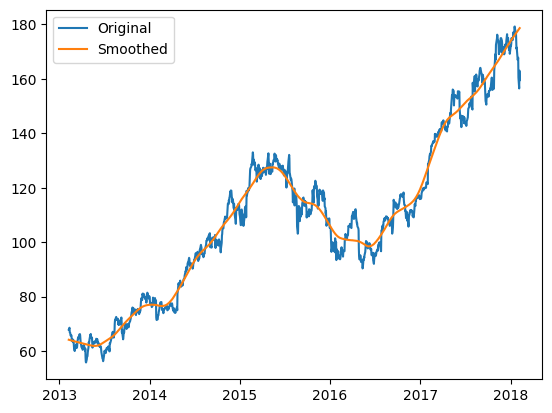

In [16]:
#7: Nonparametric Methods
#Kernel Smoothing or Local Regression
from statsmodels.nonparametric.smoothers_lowess import lowess

smoothed = lowess(company_data['close'], company_data.index, frac=0.1)
plt.plot(company_data['close'], label='Original')
plt.plot(company_data.index, smoothed[:, 1], label='Smoothed')
plt.legend()
plt.show()


In [17]:
#8: Evaluation
#8.1 Model Evaluation Metrics
#Calculate RMSE, MAE, etc.
from sklearn.metrics import mean_squared_error, mean_absolute_error

rmse = mean_squared_error(company_data['close'].iloc[-30:], forecast, squared=False)
mae = mean_absolute_error(company_data['close'].iloc[-30:], forecast)
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')


RMSE: 13.185013083042435
MAE: 12.094333333333338


c:\Users\ADMIN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
